In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
#The S&P 500, or simply the SPX, is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States.

df=pd.read_excel('SPX 2002-2020 OHLC Data.xlsx')
df.head()

,Date/Time,Open,High,Low,Close,Range
0,2002-01-02,1148.08,1154.6700,1136.2300,1154.67,18.4400
1,2002-01-03,1154.67,1165.2700,1154.0100,1165.27,11.2600
2,2002-01-04,1165.27,1176.5501,1163.4200,1172.52,13.1301
3,2002-01-07,1172.51,1176.9700,1163.5501,1164.89,13.4199
4,2002-01-08,1164.89,1167.6000,1157.4600,1160.71,10.1400


In [12]:
df=df.sort_values('Date/Time')
df.head()

,Date/Time,Open,High,Low,Close,Range
0,2002-01-02,1148.08,1154.6700,1136.2300,1154.67,18.4400
1,2002-01-03,1154.67,1165.2700,1154.0100,1165.27,11.2600
2,2002-01-04,1165.27,1176.5501,1163.4200,1172.52,13.1301
3,2002-01-07,1172.51,1176.9700,1163.5501,1164.89,13.4199
4,2002-01-08,1164.89,1167.6000,1157.4600,1160.71,10.1400


In [13]:
df.shape

(4785, 6)

In [14]:
df.describe()

,Open,High,Low,Close,Range
count,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000
mean,1689.576537,1699.080521,1679.332416,1689.847918,19.748105
std,698.239313,700.581871,695.583161,698.328004,16.642677
min,679.280000,695.270000,666.790000,676.530000,2.900100
25%,1157.190000,1165.290000,1146.970000,1157.540000,10.370000
50%,1402.430000,1407.890000,1394.830000,1402.600000,15.170000
75%,2101.710000,2109.080000,2092.130000,2102.150000,23.070000
max,3750.010000,3760.200000,3730.210000,3756.070000,218.960000


In [15]:
df.isna().sum()

Date/Time    0
Open         0
High         0
Low          0
Close        0
Range        0
dtype: int64

<function matplotlib.pyplot.show>

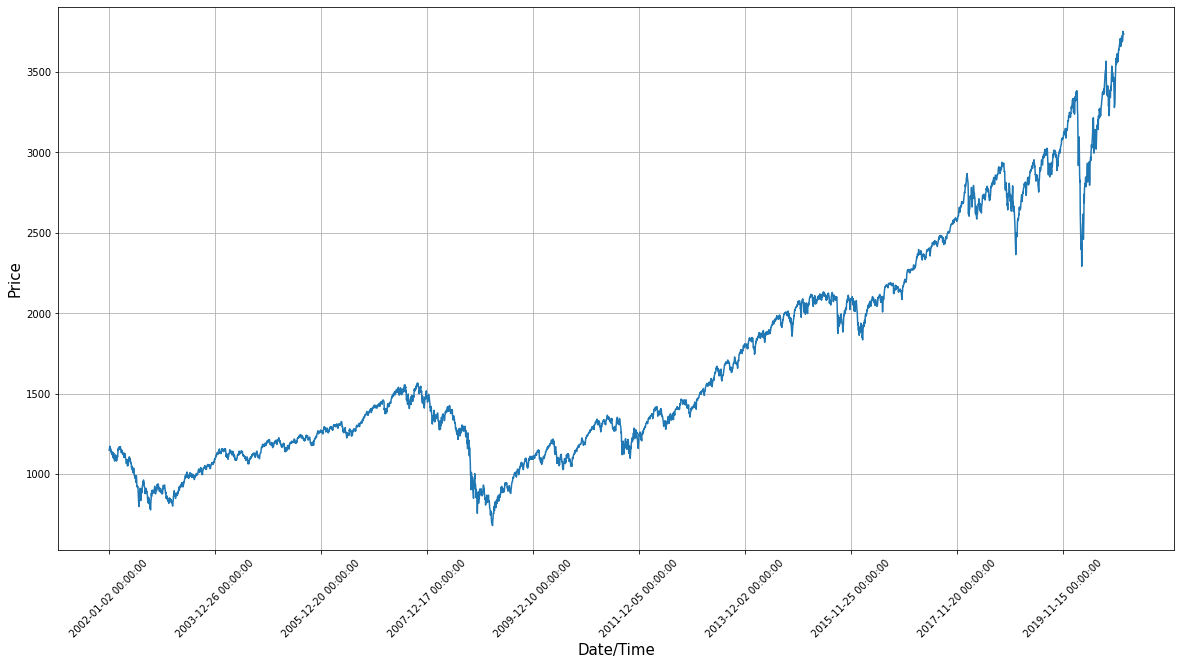

In [38]:
plt.figure(figsize=(20,10))
plt.plot(range(df.shape[0]),df['Open'])
plt.xticks(range(0,df.shape[0],500),df['Date/Time'].loc[::500],rotation=45)
plt.xlabel('Date/Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.grid()
plt.show

In [17]:
df1=df.iloc[:,[1]].values  #Open Values only
Tr_set=df1[:3200]  #Training Set
Ts_set=df1[3200:]  #Test Set

In [18]:
Tr_set.shape    

(3200, 1)

In [19]:
Ts_set.shape

(1585, 1)

In [20]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


In [21]:
sc = MinMaxScaler(feature_range=(0,1))   #Building Scaling model(Sc), We are keeping feature range in between 0 to 1.It is kind of Hyper parameter
Tr_scaled=sc.fit_transform(Ts_set)         #Training and test data in scaled form
Ts_scaled=sc.fit_transform(Ts_set)

In [22]:
#We have selected first 100 elemenent in opening column for training data set

seq_len=100
X_train=[]
y_train=[]
for i in range(seq_len,len(Tr_scaled)-seq_len):
    X_train.append(Tr_scaled[i-seq_len:i,0])
    y_train.append(Tr_scaled[i,0])

In [23]:
type(X_train)          #X_train is in list now, we will need array

list

In [24]:
X_train,y_train=np.array(X_train),np.array(y_train)   #Converting X_train and y_train in arrays

In [25]:
X_train[0]

array([0.0885261 , 0.09357146, 0.09166184, 0.08315724, 0.07823188,
       0.08552601, 0.06929944, 0.07594659, 0.07555528, 0.072023  ,
       0.05866086, 0.05985568, 0.07127689, 0.06728547, 0.05329723,
       0.0700612 , 0.04812142, 0.03769677, 0.02280589, 0.02127715,
       0.01176557, 0.01644049, 0.02724602, 0.03964291, 0.0562921 ,
       0.05093368, 0.06166617, 0.06760374, 0.06821419, 0.07820579,
       0.07622312, 0.08755041, 0.09642546, 0.09517325, 0.09490194,
       0.09909684, 0.10380829, 0.10362567, 0.10685533, 0.10662054,
       0.10738231, 0.10765884, 0.10690229, 0.10856669, 0.11361727,
       0.11085719, 0.11690433, 0.12087488, 0.12352539, 0.1220697 ,
       0.12594111, 0.12124532, 0.11497905, 0.12211665, 0.12534631,
       0.12489761, 0.12597242, 0.11642953, 0.11763478, 0.1014917 ,
       0.10276478, 0.08954873, 0.07999019, 0.07323869, 0.09682721,
       0.11877221, 0.12307146, 0.12943687, 0.13036038, 0.13090822,
       0.13264566, 0.13309437, 0.12976558, 0.11765565, 0.11532

In [26]:
len(X_train[0])

100

In [27]:
y_train[0]

0.12269058389552379

In [28]:
#Testing Dataset


X_test=[]
y_test=[]
for i in range(seq_len,len(Ts_scaled)-seq_len):
    X_test.append(Ts_scaled[i-seq_len:i,0])
    y_test.append(Ts_scaled[i,0])

In [29]:
type(X_test)   #we need to convert it in array

list

In [30]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_train.shape  #Converting list to array 

(1385, 100)

In [31]:
X_test,y_test=np.array(X_test),np.array(y_test) 
X_test.shape

(1385, 100)

In [32]:
#Converting Training dataset to 3d tensor
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1385, 100, 1)

In [33]:
#Converting Testing dataset to 3d tensor
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape


(1385, 100, 1)

In [34]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))  #LSTM acting as Recurrent layer
model.add(Dropout(0.1))               #Hidden Layer
model.add(LSTM(units=50,return_sequences=True))  ##LSTM acting as Recurrent layer
model.add(Dropout(0.2))             #Hidden Layer
model.add(tf.keras.layers.GRU(units=50))      ##GRU acting as Recurrent layer
model.add(Dropout(0.2))             #Hidden Layer
model.add(Dense(units=1))




In [35]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
44/44 [==============================] - 11s 134ms/step - loss: 0.0353
Epoch 2/5
44/44 [==============================] - 6s 138ms/step - loss: 0.0038
Epoch 3/5
44/44 [==============================] - 6s 140ms/step - loss: 0.0032
Epoch 4/5
44/44 [==============================] - 6s 143ms/step - loss: 0.0029
Epoch 5/5
44/44 [==============================] - 6s 143ms/step - loss: 0.0029


In [36]:
y_hat=model.predict(X_test)

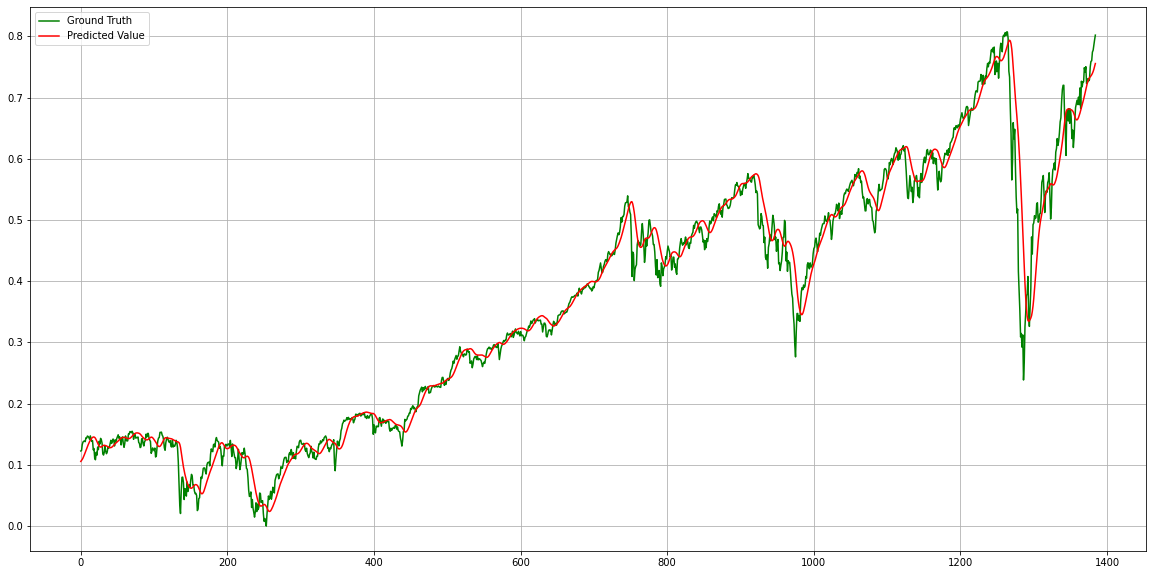

In [37]:
plt.figure(figsize=(20,10))
plt.plot(y_test,color='g',label='Ground Truth')
plt.plot(y_hat,color='r',label='Predicted Value')
plt.legend()
plt.grid()
plt.show()